## importing required libraries :

In [101]:
import pandas as pd
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [102]:
df = pd.read_csv('Mall_Customers.csv')

In [103]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [104]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data transformation using minmaxscaler():

In [105]:
scaler = MinMaxScaler()

df['Annual Income (k$)'] = scaler.fit_transform(df[['Annual Income (k$)']])
df['Spending Score (1-100)'] = scaler.fit_transform(df[['Spending Score (1-100)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


## Elbow Method (To find optimal number of clusters):

In [107]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


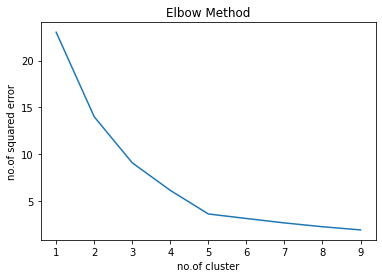

In [110]:

plt.xlabel('no.of cluster')
plt.ylabel('no.of squared error')
plt.title('Elbow Method')
plt.plot(k_rng,sse)

### optimal number of cluster is 5

## K-Means Algorithms

In [111]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans_pred = kmeans.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
kmeans_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [112]:
df['cluster_kmeans'] = kmeans_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans
0,1,Male,19,0.000000,0.387755,2
1,2,Male,21,0.000000,0.816327,3
2,3,Female,20,0.008197,0.051020,2
3,4,Female,23,0.008197,0.775510,3
4,5,Female,31,0.016393,0.397959,2


In [113]:
kmeans.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


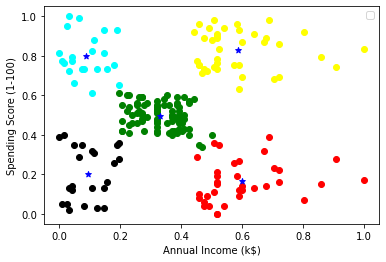

In [114]:
df1 = df[df.cluster_kmeans==0]
df2 = df[df.cluster_kmeans==1]
df3 = df[df.cluster_kmeans==2] 
df4 = df[df.cluster_kmeans==3] 
df5 = df[df.cluster_kmeans==4] 

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color = 'green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color = 'red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color = 'black')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color = 'cyan')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color = 'yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'blue',marker = '*')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

## Other clustering Algorithms:

### Agglomerative Clustering:

In [118]:
agg_clustering = AgglomerativeClustering(n_clusters=5)

agg_pred = agg_clustering.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
agg_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [119]:
df['cluster_agg'] = agg_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans,cluster_agg
0,1,Male,19,0.000000,0.387755,2,4
1,2,Male,21,0.000000,0.816327,3,3
2,3,Female,20,0.008197,0.051020,2,4
3,4,Female,23,0.008197,0.775510,3,3
4,5,Female,31,0.016393,0.397959,2,4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


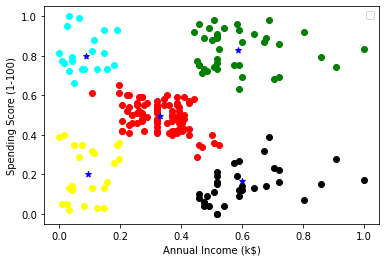

In [120]:
df1 = df[df.cluster_agg==0]
df2 = df[df.cluster_agg==1]
df3 = df[df.cluster_agg==2] 
df4 = df[df.cluster_agg==3] 
df5 = df[df.cluster_agg==4] 

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color = 'green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color = 'red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color = 'black')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color = 'cyan')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color = 'yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'blue',marker = '*')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

### Spectral Clustering :

In [121]:
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
spectral_pred = spectral_clustering.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
spectral_pred

C:\anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [122]:
df['cluster_spectral'] = spectral_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans,cluster_agg,cluster_spectral
0,1,Male,19,0.000000,0.387755,2,4,1
1,2,Male,21,0.000000,0.816327,3,3,4
2,3,Female,20,0.008197,0.051020,2,4,1
3,4,Female,23,0.008197,0.775510,3,3,4
4,5,Female,31,0.016393,0.397959,2,4,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


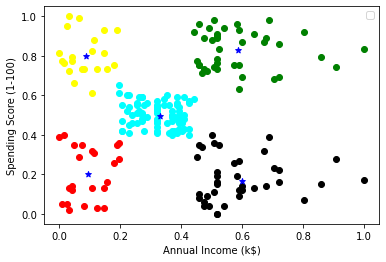

In [124]:
df1 = df[df.cluster_spectral==0]
df2 = df[df.cluster_spectral==1]
df3 = df[df.cluster_spectral==2] 
df4 = df[df.cluster_spectral==3] 
df5 = df[df.cluster_spectral==4] 

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color = 'green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color = 'red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color = 'black')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color = 'cyan')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color = 'yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'blue',marker = '*')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

## Comparing All the Clustering Algorithms :

In [125]:
silhouette_kmeans = silhouette_score(df[['Annual Income (k$)']],df['cluster_kmeans'])
print('K-Means Algorithm score :',silhouette_kmeans)

K-Means Algorithm score : 0.17758927999212346


In [126]:
silhouette_agg = silhouette_score(df[['Annual Income (k$)']],df['cluster_agg'])
print('Agglomerative Clustering score :',silhouette_agg)

Agglomerative Clustering score : 0.1609848999526072


In [127]:
silhouette_spectral = silhouette_score(df[['Annual Income (k$)']],df['cluster_spectral'])
print('spectral Clustering score :',silhouette_spectral)

spectral Clustering score : 0.18585007023461142


## Conclustion:
###  Spectral Clustering is better clustering model...